In [35]:
import numpy as np
import pandas as pd
import statsmodels.tsa.arima.model as stats

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head(1000)

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [37]:
train_data = df[1:len(df)-12]
test_data = df[len(df)-12:]

In [64]:
model = stats.ARIMA(train_data.value, order=(0, 1, 0))
model_fit = model.fit()

In [66]:
start = len(train_data)
end = len(train_data) + len(test_data)-1
predictions = model_fit.predict(start=start, end=end)
print(predictions)

192    20.681002
193    20.681002
194    20.681002
195    20.681002
196    20.681002
197    20.681002
198    20.681002
199    20.681002
200    20.681002
201    20.681002
202    20.681002
203    20.681002
Name: predicted_mean, dtype: float64


In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  191
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -415.148
Date:                Sat, 29 Oct 2022   AIC                            832.297
Time:                        17:31:18   BIC                            835.544
Sample:                             0   HQIC                           833.612
                                - 191                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.6279      0.204     22.739      0.000       4.229       5.027
===================================================================================
Ljung-Box (L1) (Q):                  31.39   Jarque-Bera (JB):               874.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.99   Skew:                            -2.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

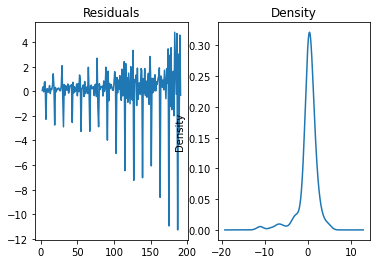

In [70]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [63]:
import statsmodels.tsa.arima.model as stats

time_series = [2, 3.0, 5, 7, 9, 11, 13, 17, 19]
steps = 4
alpha = 0.05

model = stats.ARIMA(time_series, order=(0, 1, 0), trend="t")   # only change is here!
model_fit = model.fit()

In [20]:
forecast = model_fit.get_forecast(steps=steps)
forecasts_and_intervals = forecast.summary_frame(alpha=alpha)

In [21]:
forecasts_and_intervals

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,21.124995,0.780622,19.595003,22.654987
1,23.249990,1.103967,21.086255,25.413725
2,25.374985,1.352078,22.724961,28.025009
3,27.499980,1.561245,24.439996,30.559964
